In [51]:
import cv2
from skimage import measure, color, morphology
import matplotlib.pyplot as plt
import numpy as np

In [52]:
testRect = {
    "audit_type": "rect",
    "id": 27,
    "page_number": 1,
    "template_signatory_id": 10,
    "x1": 0.122898037659841,
    "x2": 0.169011505478072,
    "y1": 0.912442396313364,
    "y2": 0.943205053865169
}

In [53]:
source_image = cv2.imread("test_files/VacantLandContract - Signed [1] (1)-0.png")


In [54]:
source_image.shape

(792, 612, 3)

In [55]:
img = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)

In [56]:
def translate_coords(coord1, coord2, span):
    return [int(coord1 * span), int(coord2 * span)]


In [57]:
def unsharp_mask(image):
    """Soften an input image.

    Parameters
    ----------
    image : numpy ndarray
        The input image.

    Returns
    -------
    numpy ndarray
        The soften image.

    """
    # perform GaussianBlur filter to use it in unsharpening mask
    gaussian_3 = cv2.GaussianBlur(image, (9, 9), 10.0)
    # calculates the weighted sum of two arrays (source image and GaussianBlur
    # filter) to perform unsharpening mask
    unsharp_image = cv2.addWeighted(image, 1.5, gaussian_3, -0.5, 0, image)
    # return unsharpened image
    return unsharp_image

In [58]:
cropped = img[slice(*translate_coords(testRect['y1'], testRect['y2'], source_image.shape[0])), slice(*translate_coords(testRect['x1'], testRect['x2'], source_image.shape[1]))]

In [59]:
cropped.shape

(25, 28)

In [60]:
cv2.imwrite("output_files/Step One Cropped.png", cropped)

True

In [61]:
sharpened = unsharp_mask(cropped)

In [62]:
cv2.imwrite("output_files/Step Two Sharpened.png", sharpened)

True

In [63]:
img = cv2.threshold(sharpened, 127, 255, cv2.THRESH_BINARY)[1]

In [64]:
blobs = img > img.mean()

In [65]:
blobs_labels = measure.label(blobs, background=1)

In [66]:
image_label_overlay = color.label2rgb(blobs_labels, image=img)

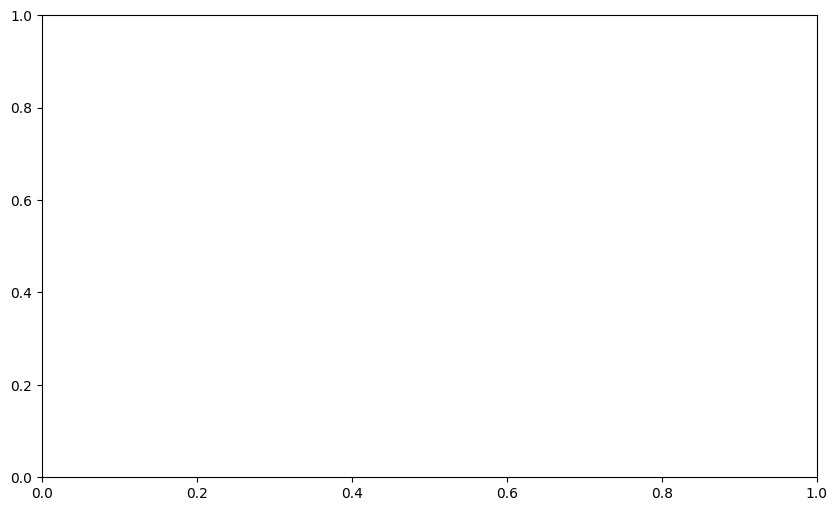

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))

In [68]:
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [69]:
plt

<module 'matplotlib.pyplot' from '/Users/mikekilmer/.pyenv/versions/3.12.1/envs/pfsignatures/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [70]:
the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0
for region in measure.regionprops(blobs_labels):
		if (region.area > 10):
				total_area = total_area + region.area
				counter = counter + 1
		# print region.area # (for debugging)
		# take regions with large enough areas
		if (region.area >= 80):
				if (region.area > the_biggest_component):
						the_biggest_component = region.area

In [71]:
the_biggest_component

119.0

In [72]:
pre_version = morphology.remove_small_objects(blobs_labels, 2)

In [74]:
pre_version

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 